In [7]:
import numpy as np
import torch
import imageio.v3 as iio
import matplotlib.pyplot as plt
from skimage import color
import scipy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

# Spatial grid and initial condition
N = 128
x = 32*np.pi*np.arange(1,N+1)/N
u = np.cos(x/16)*(1+np.sin(x/16))
v = fft(u)

# Precompute ETDRK4 scalar quantities
h = 1/4
k = np.concatenate([np.arange(0,N/2),np.array([0.]),np.arange(-N/2+1,0)],0)/16
L = k**2 - k**4
E = np.exp(h*L)
E2 = np.exp(h*L/2)
M = 16
r = (1j*np.pi*(np.arange(1,M+1)-.5)/M)
LR = np.repeat(h*L[:,None],M,1) + np.repeat(r[None,:],N,0)
Q = h*np.mean(((np.exp(LR/2)-1)/LR),1).real
f1 = h*np.mean(((-4-LR+np.exp(LR)*(4-3*LR+LR**2))/LR**3),1).real
f2 = h*np.mean(((2+LR+np.exp(LR)*(-2+LR))/LR**3),1).real
f3 = h*np.mean(((-4-3*LR-LR**2+np.exp(LR)*(4-LR))/LR**3),1).real

# Timestepping
uu = [u]
tt = [0]
tmax = 150
nmax = int(tmax/h)
nplt = int((tmax/100)/h)
g = -.5j*k

for n in range(1,nmax+1):
    t = n*h
    Nv = g * fft(ifft(v).real**2)
    a = E2*v + Q*Nv
    Na = g * fft(ifft(a).real**2)
    b = E2*v + Q*Na
    Nb = g * fft(ifft(b).real**2)
    c = E2*a + Q*(2*Nb-Nv)
    Nc = g * fft(ifft(c).real**2)
    v = E*v + Nv*f1 + 2*(Na+Nb)*f2 + Nc*f3
    if n%nplt==0:
        u = ifft(v).real
        uu.append(u)
        tt.append(t)

uu = np.stack(uu)
tt = np.array(tt)


In [52]:
uu = uu.transpose()
print(np.shape(uu))
print(np.shape(x))
print(np.shape(tt))

(128, 101)
(128,)
(101,)


Text(0, 0.5, 'x')

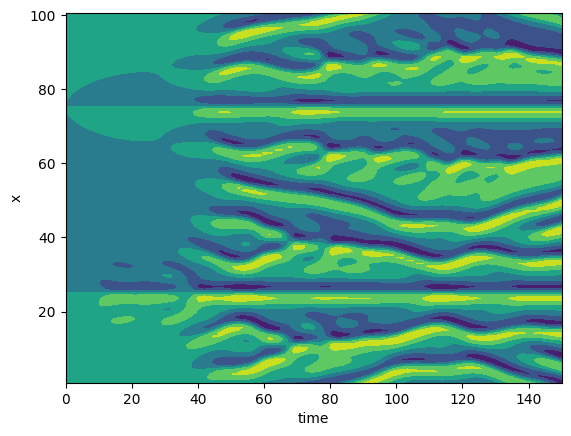

In [53]:
plt.contourf(tt,x, uu)
plt.xlabel('time')
plt.ylabel('x')

In [54]:
[U,S,V] = np.linalg.svd(uu)

In [55]:
print(np.shape(U))
print(np.shape(V))
print(np.shape(S))



(128, 128)
(101, 101)
(101,)


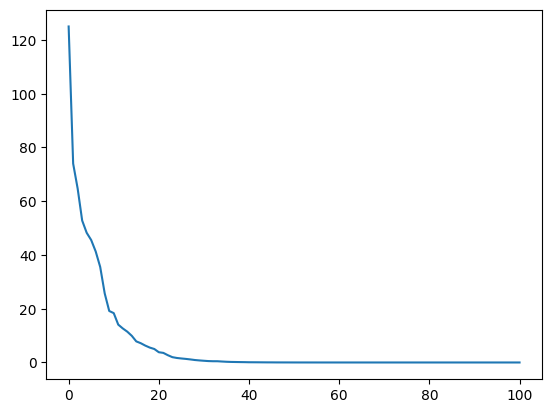

In [56]:
plt.plot(S)

In [61]:

def reconstruct_image(U,S,Vh,rank):

 im_red_rank = np.zeros([128,101])
 for k in range (0, rank):
   im_red_rank = im_red_rank + (U[:,k].reshape([128,1]))*S[k].reshape([1,1])*Vh[k,:].reshape([1,101])

 return im_red_rank



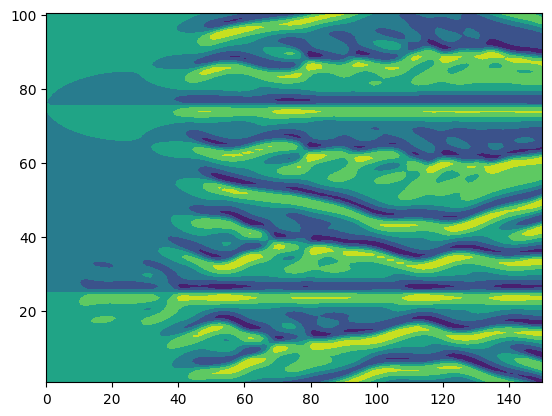

In [67]:
rank = 100
uu_red_rank = reconstruct_image(U,S,V,rank)
plt.contourf(tt, x, uu_red_rank)

Text(0, 0.5, 'x')

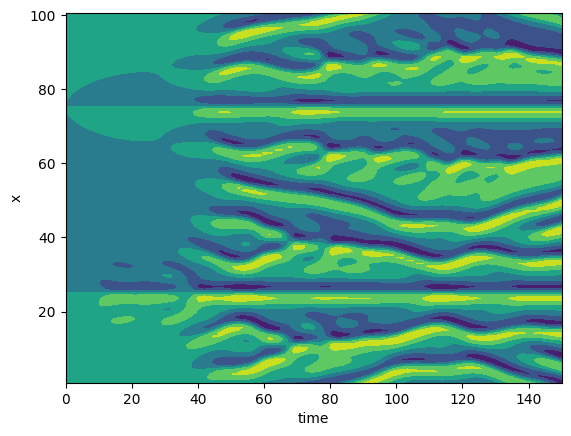

In [65]:
plt.contourf(tt,x, uu)
plt.xlabel('time')
plt.ylabel('x')